# **Predicting player's engagement based on age**

## **Introduction**

This data set was compiled by a research group at UBC who were observing how players interacted with a Minecraft server. By analyzing this dataset, we are interested in seeing which types of players contribute to high volumes of data, indicating that they may be worth pursuing for recruitment. Specifically, we would like to know if player age can be a predictor for whether a player is a low, hour, medium-hour, or high-hour player. Using this predictive model, we can then better understand which types of players are more likely to heavily interact with the game, and as such, are worth targeting for recruitment. 

Our research question is: 
> Can player age accurately predict whether the player is a low-hour, medium-hour or high-hour player?

#### Describing the dataset

To achieve this, we took the original players.csv dataset and focused on each player’s age along with the resulting play-time length to build the model. Players.csv is a dataset that records the experience level, subscription status, identity, and age of each player: 

| Name of variable | Type | Description |
|----------------- | ---- | ----------- |
| experience | chr | The self-reported level of experience of each player |
| subscribe | lgl | The player's subscription status to a game-related newsletter |
| hashedEmail | chr | The hashed email addresses of each player to identify players without revealing their contact information| 
| played_hours | dbl | The numbers of hours players were playing the game |
| name | chr | The names of each of the players | 
| gender | chr | The gender that each player identifies by | 
| Age | dbl | The age of each player in years |

## **Method**

In [2]:
#Loading the libraries
library(tidyverse)
library(tidymodels)
library(dplyr)
library(RColorBrewer)
set.seed(42)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### **1. Data processing**

Before starting the analysis, we cleaned and wrangled the dataset so that it is suitable for use. First, we read in the dataset using a URL. 

In [3]:
players_url <- read_csv("https://raw.githubusercontent.com/emma-chow/DSCI-Final-Project/70bbf2c6fcb0a1fd395c3b650eb82c00067f8953/players.csv")
head(players_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


To tidy the dataset, we identified whether there are missing values that need to be removed so that no error messages are returned when finding summary statistics. 

In [4]:
players_missing <- players_url |> 
    sapply(function(x) sum(is.na(x)))
players_missing

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

As shown above, there are very little missing values in the dataset, in the variable "Age". So, the missing observations can be removed without biasing the data. 

In [6]:
players_data <- players_url |>
    drop_na()
glimpse(players_data)

Rows: 194
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


Then, the variables used in the analysis were selected to create a separate dataframe. 

In [7]:
players <- players_data |>
select(subscribe, Age, played_hours) 
head(players)

subscribe,Age,played_hours
<lgl>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0


In order to determine the engagement level of the players, the played hours variable was categorised. The split of low, medium and high hours were decided using data from Statista (U.S. Adults Weekly Gaming Hours by Age 2024 | Statista, 2024). According to this source, the majority of people played between 1-15 hours. 

In [83]:
players_engagement <- players |>
mutate(engagement_level = factor((played_hours > 15) + (played_hours > 1), 
    levels = c(0, 1, 2), 
    labels = c("Low", "Medium", "High"))) 
head(players_engagement)

subscribe,Age,played_hours,engagement_level
<lgl>,<dbl>,<dbl>,<fct>
TRUE,9,30.3,High
TRUE,17,3.8,Medium
FALSE,17,0.0,Low
TRUE,21,0.7,Low
TRUE,21,0.1,Low
TRUE,17,0.0,Low


Then, the data was split 70/30 into training and testing data. 

In [84]:
set.seed(1)
players_split <- initial_split(players_engagement, prop = 0.70, strata = engagement_level)  
players_train <- training(players_split)
players_test <- testing(players_split)

head(players_train)
head(players_test)

subscribe,Age,played_hours,engagement_level
<lgl>,<dbl>,<dbl>,<fct>
TRUE,9,30.3,High
TRUE,21,0.7,Low
FALSE,21,0.0,Low
TRUE,17,0.0,Low
FALSE,22,0.0,Low
TRUE,17,0.0,Low


subscribe,Age,played_hours,engagement_level
<lgl>,<dbl>,<dbl>,<fct>
FALSE,17,0.0,Low
TRUE,21,0.1,Low
TRUE,17,0.0,Low
TRUE,19,0.0,Low
TRUE,17,0.1,Low
TRUE,22,0.0,Low


In [85]:
#finding the proportions of classes within the entire dataset
players_proportions <- players_engagement |> 
    group_by(engagement_level) |>
    summarize(n = n()) |>
    mutate(percent = n/nrow(players_engagement)*100)
players_proportions

engagement_level,n,percent
<fct>,<int>,<dbl>
Low,158,81.443299
Medium,24,12.371134
High,12,6.185567


In [117]:
#finding the proportions of training and testing data
players_train_proportions <- players_train |> 
    group_by(engagement_level) |>
    summarize(n = n()) |>
    mutate(percent = n/nrow(players_train)*100)
players_train_proportions

players_test_proportions <- players_test |> 
    group_by(engagement_level) |>
    summarize(n = n()) |>
    mutate(percent = n/nrow(players_test)*100)
players_test_proportions

engagement_level,n,percent
<fct>,<int>,<dbl>
Low,109,80.740741
Medium,16,11.851852
High,10,7.407407


engagement_level,n,percent
<fct>,<int>,<dbl>
Low,49,83.050847
Medium,8,13.559322
High,2,3.389831


In [87]:
players_summary <- players_train |>
    summary()
players_summary

 subscribe            Age         played_hours    engagement_level
 Mode :logical   Min.   : 8.00   Min.   :  0.00   Low   :109      
 FALSE:37        1st Qu.:17.00   1st Qu.:  0.00   Medium: 16      
 TRUE :98        Median :18.00   Median :  0.10   High  : 10      
                 Mean   :20.59   Mean   :  6.21                   
                 3rd Qu.:23.00   3rd Qu.:  0.65                   
                 Max.   :49.00   Max.   :218.10                   

In [88]:
players_hours_stats <- players_train |>
    summarise(played_hours_min = min(played_hours), 
              played_hours_mean = mean(played_hours), 
              played_hours_median = median(played_hours), 
              played_hours_max = max(played_hours))
players_hours_stats

played_hours_min,played_hours_mean,played_hours_median,played_hours_max
<dbl>,<dbl>,<dbl>,<dbl>
0,6.21037,0.1,218.1


#### **2. Preliminary visualisations**

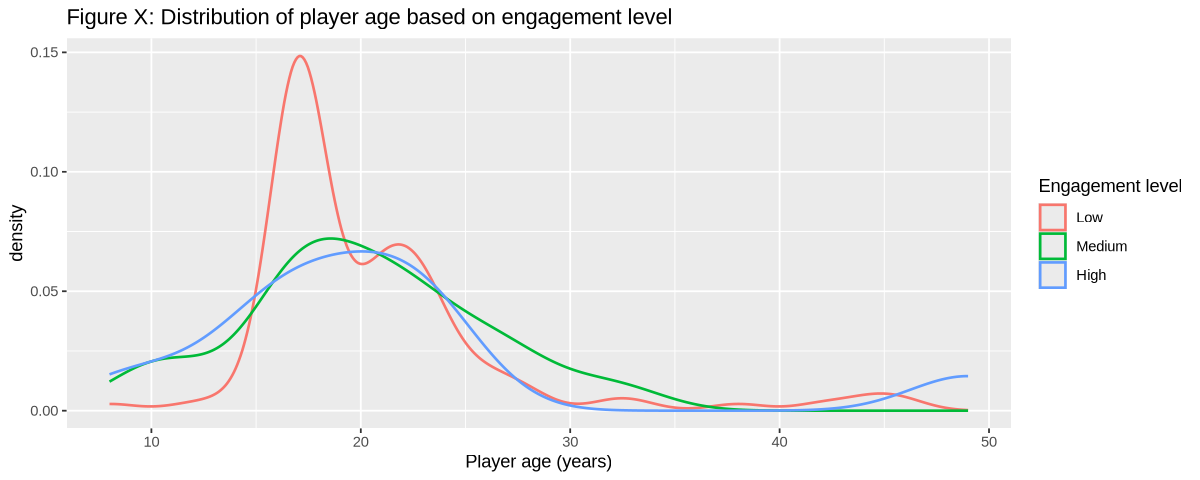

In [120]:
options(repr.plot.height = 4, repr.plot.width = 10)
plot_1 <- players_train |>
    ggplot(aes(x = Age, colour = engagement_level)) +
    geom_density(alpha = 0.2, linewidth = 0.75) + 
    labs(x = "Player age (years)", 
         colour = "Engagement level", 
         title = "Figure X: Distribution of player age based on engagement level") +
    theme(element_text(size = 10))
plot_1

#### **3. Data analysis**

In [108]:
set.seed(2)
players_recipe <- recipe(engagement_level ~ Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1851852
Best kernel: rectangular
Best k: 2

In [109]:
set.seed(3)
players_vfold <- vfold_cv(players_train, v = 5, strata = engagement_level)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 1))

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

→ A | warning: ✖ No observations were detected in `truth` for level: High.
               ℹ Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





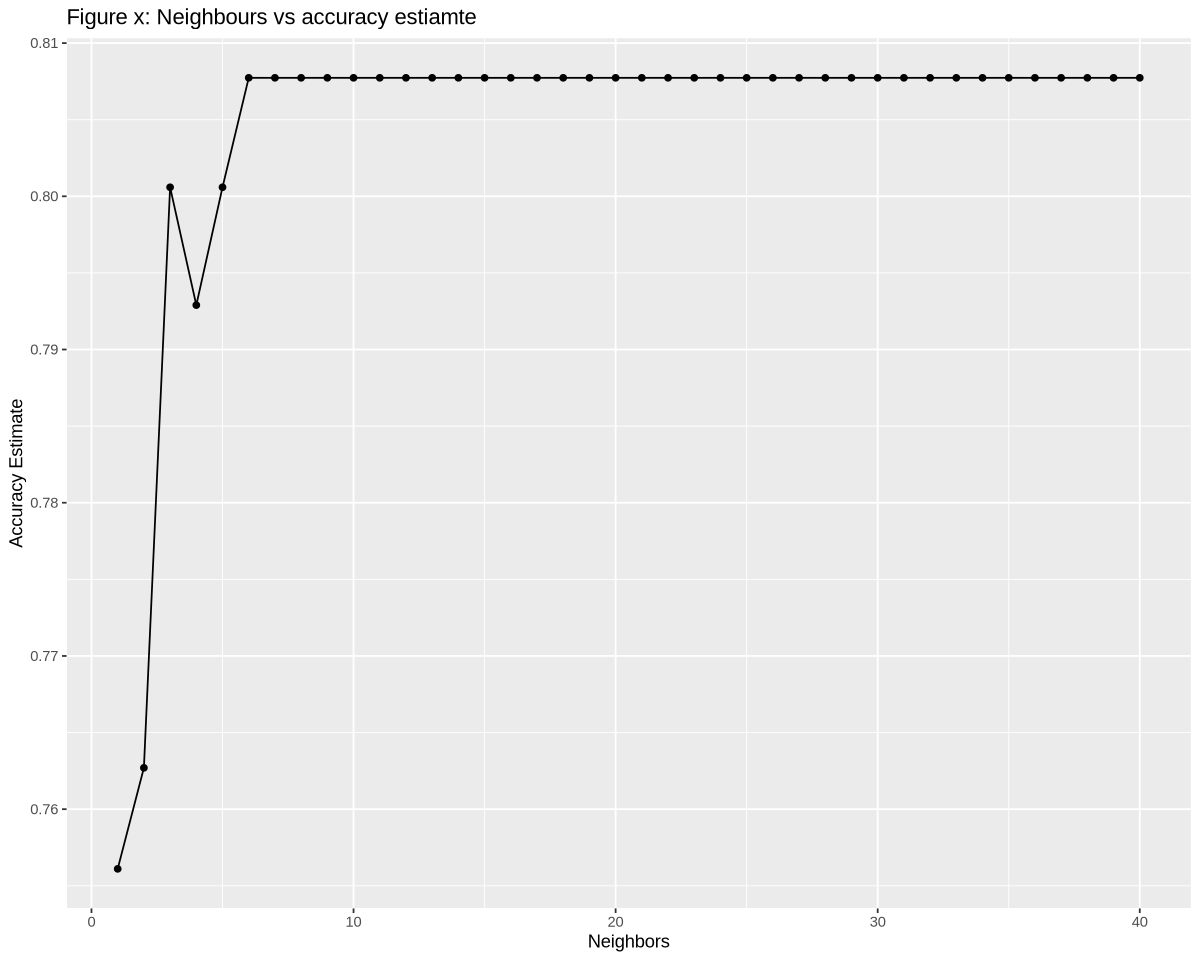

In [112]:
set.seed(4)
options(repr.plot.height = 8, repr.plot.width = 10)
k_acc <- players_fit |>
    filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(k_acc, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure x: Neighbours vs accuracy estiamte")
accuracy_vs_k

In [113]:
best_k <- k_acc |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
best_k

[1] 6

In [114]:
set.seed(3)

knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit_best <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec_best) |>
    fit(data = players_train)

players_fit_best

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(6,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1925926
Best kernel: rectangular
Best k: 6

In [115]:
players_test_predictions <- predict(players_fit_best, players_test) |>
    bind_cols(players_test) 

players_test_predictions |>
    metrics(truth = engagement_level, estimate = .pred_class) |>
    filter(.metric == "accuracy")

players_test_predictions |>
    precision(truth = engagement_level, estimate = .pred_class, event_level = "first") 

players_test_predictions |>
    recall(truth = engagement_level, estimate = .pred_class, event_level = "first")

confusion <- players_test_predictions |>
    conf_mat(truth = engagement_level, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8305085


Warning message:
“While computing multiclass `precision()`, some levels had no predicted events
(i.e. `true_positive + false_positive = 0`).
Precision is undefined in this case, and those levels will be removed from the
averaged result.
Note that the following number of true events actually occurred for each
problematic event level:
'Medium': 8, 'High': 2”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.8305085


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.3333333


          Truth
Prediction Low Medium High
    Low     49      8    2
    Medium   0      0    0
    High     0      0    0